#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

## Load Dataset

In [2]:
# Read CSV
url='https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
print(df.duplicated().value_counts())

False    147
True       3
dtype: int64


In [4]:
#mengahaus yang duplicates
df.drop_duplicates(keep='first', inplace=True)
sum(df.duplicated())

0

In [5]:
#cek apakah masih ada duplicate
df.duplicated().values.any()

False

Periksa apakah ada missing values

In [6]:
print(df.isnull().any())

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

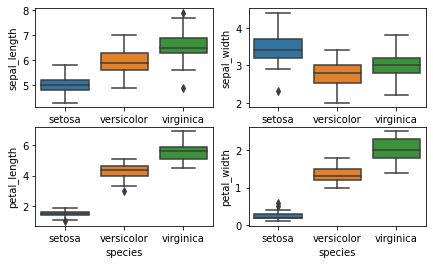

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(7,4))
sns.boxplot(ax=axes[0, 0], data=df, x='species', y='sepal_length')
sns.boxplot(ax=axes[0, 1], data=df, x='species', y='sepal_width')
sns.boxplot(ax=axes[1, 0], data=df, x='species', y='petal_length')
sns.boxplot(ax=axes[1, 1], data=df, x='species', y='petal_width')
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [8]:
# variabel independent
X = df.iloc[:, :-1].values
# Variabel Dependent
y = df.iloc[:, -1].values

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [11]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [12]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa']


In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[9 0 0]
 [0 2 0]
 [0 0 4]]
Accuracy Score:  1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [14]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
model = GaussianNB()
# fit the model
model.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [15]:
y_pred = model.predict(X_test)
print(y_pred)

['setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [16]:
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm2)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[9 0 0]
 [0 2 0]
 [0 0 4]]
Accuracy Score:  1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [17]:
classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [18]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [19]:
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm3)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[9 0 0]
 [0 2 0]
 [0 0 4]]
Accuracy Score:  1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [20]:
print("ke-3 model memiliki akurasi nilai yang sama")

ke-3 model memiliki akurasi nilai yang sama
